In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'
# fix random seed for reproducibility
#np.random.seed(7)

In [2]:
# Create images with random disks and bounding boxes. 
num_imgs = 50000

img_size = 50 # size 0:50, 0:50
min_object_size = 5
max_object_size = 35
num_objects = 1

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size))  # set background to 0
noise = np.zeros((num_imgs, img_size, img_size))  # set noise to 0

# EF
xm, ym = np.mgrid[:img_size, :img_size]
x0, y0, r0 = 35, 35, 25

for i_img in range(num_imgs):
    for i_object in range(num_objects):
        x0, y0 = np.random.randint(min_object_size, max_object_size, size=2)
        r0 = np.random.randint(8,16)
        dr = 0       
        disk = (xm - x0) ** 2 + (ym - y0) ** 2
        imgs[i_img] = ( disk <= r0 ** 2 )     
        bboxes[i_img, i_object] = [x0 , y0, r0, dr]
        
print(x0, y0, r0, dr)

29 9 14 0


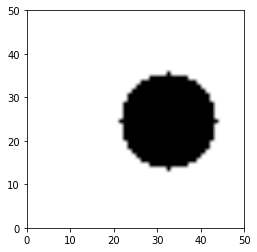

In [3]:
i = 0
plt.imshow(imgs[i].T, cmap='Greys', interpolation='bilinear', origin='lower', extent=[0, img_size, 0, img_size])

In [4]:
# Reshape and normalize the image data to mean 0 and std 1. 
X = (imgs - 0.) / 1.
X = X.reshape(num_imgs, img_size, img_size, 1)
X.shape, np.mean(X), np.std(X)

((50000, 50, 50, 1), 0.162959368, 0.36932859675503094)

In [5]:
# Normalize x, y, w, h by img_size, so that all values are between 0 and 1.
# Important: Do not shift to negative values (e.g. by setting to mean 0), because the IOU calculation needs positive w and h.
y = bboxes.reshape(num_imgs, -1) / img_size
y.shape, np.mean(y), np.std(y)
print(y[:5])

[[0.64 0.48 0.22 0.  ]
 [0.14 0.4  0.26 0.  ]
 [0.26 0.3  0.28 0.  ]
 [0.2  0.68 0.26 0.  ]
 [0.14 0.4  0.22 0.  ]]


In [6]:
# Split training and test.
i = int(0.8 * num_imgs)
train_X = X[:i]
test_X = X[i:]
train_y = y[:i]
test_y = y[i:]
test_imgs = imgs[i:]
test_bboxes = bboxes[i:]

In [7]:
# Build the model.
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.models import model_from_json

# load json and create model
json_file = open('model-cnn-2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model-cnn-2.h5")
print("Loaded model from disk")

loaded_model.compile('adam', 'mse')

#score = loaded_model.evaluate(X, y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[0], score[0]))

Using TensorFlow backend.


FileNotFoundError: [Errno 2] No such file or directory: 'model-cnn-2.json'

In [ ]:
# Train.
#history = model.fit(train_X, train_y, epochs=30, validation_data=(test_X, test_y), verbose=2)

In [ ]:
# we have 157 CT images in shape (157,50,50)
output_path = "/home/ef2p/Kaggle/cardiac/Documents/"
id = 0
imgs_to_process = np.load(output_path+'fullimages_{}.npy'.format(id))
#imgs_to_process = imgs_to_process.reshape(imgs_to_process.shape[0], imgs_to_process.shape[1], imgs_to_process.shape[2], 1)
#imgs_to_process = imgs_to_process.reshape(-1, img_size, img_size, 1)
print(imgs_to_process.shape)


In [ ]:
# loaded normalized images
# Predict bounding boxes on the test images.
#pred_y = loaded_model.predict(imgs_to_process)
#pred_bboxes = pred_y * img_size
plt.figure(figsize=(12, 3))
plt.imshow(imgs_to_process[0], cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])

In [ ]:
# Show a few test images and predicted circles from the test dataset. 
plt.figure(figsize=(12, 3))
for i_subplot in range(1, 5):
    plt.subplot(1, 4, i_subplot)
    i = np.random.randint(len(imgs_to_process.shape[0]))
    plt.imshow(imgs_to_process[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    plt.gca().add_patch(matplotlib.patches.Circle((pred_bboxes[i,0], pred_bboxes[i,1]), pred_bboxes[i,2], ec='r', fc='none'))
        
plt.savefig('plots/ring-read-cnn-2-prediction.png', dpi=300)